In [4]:
import numpy as np
import gc
import h5py
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib as mpl
#from sklearn.neighbors import KDTree
import threading
from numpy import linalg as LA
from sympy import Plane, Point3D
import pandas as pd
from mpl_toolkits.axes_grid1 import AxesGrid
import matplotlib.colors as colors
import matplotlib.cbook as cbook
import math
import copy
import sys
import os
from os.path import isfile, join
from scipy.spatial import cKDTree
from scipy.optimize import curve_fit
import scipy
from scipy import integrate
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
import time

plt.rcParams['font.weight'] = 'normal'
plt.rcParams['text.usetex']=False
plt.rcParams['font.family']='stixgeneral'
plt.rcParams['mathtext.fontset']='stix'
plt.rcParams['font.size'] = 20
plt.rc('figure', facecolor='w')

## Constants in cgs unites
G=6.67408e-8
H=67.26*3.2408e-20
k_B=1.38064852e-16
M_sun=1.99e+33
pc=3.086e18
kpc=3.086e21
Mpc=3.086e24
Gyr=365*24*3600*1e9
Myr=365*24*3600*1e6
m_p=1.6726219e-24
eV=1.602176634e-12
h_bar=1.0545718e-27
R_sun=6.957e+10

h=0.6774

In [5]:
df=pd.read_csv('result.txt',sep='\s+',header=None)
df

,0,1,2,3,4,5
0,1.0,0.0,11.0,0.5,0.929294,0.365727
1,1.0,0.0,11.0,1.0,1.213798,0.176373
2,1.0,0.0,12.0,0.5,0.885526,0.438872
3,1.0,0.0,12.0,1.0,1.021977,0.365727
4,1.0,0.0,13.0,0.5,0.836866,0.526647
...,...,...,...,...,...,...
353,3.0,0.0,50.0,5.0,0.913661,0.910046
354,3.0,0.0,60.0,1.0,4.272581,5.634766
355,3.0,0.0,60.0,2.0,0.782724,1.887071
356,3.0,0.0,60.0,3.0,0.821962,1.092055


In [6]:
m_l=df[0]
v=df[2]
r=df[3]
chisq=df[4]

In [7]:
i1=np.where(m_l==1)[0]
i2=np.where(m_l==2)[0]
i3=np.where(m_l==3)[0]


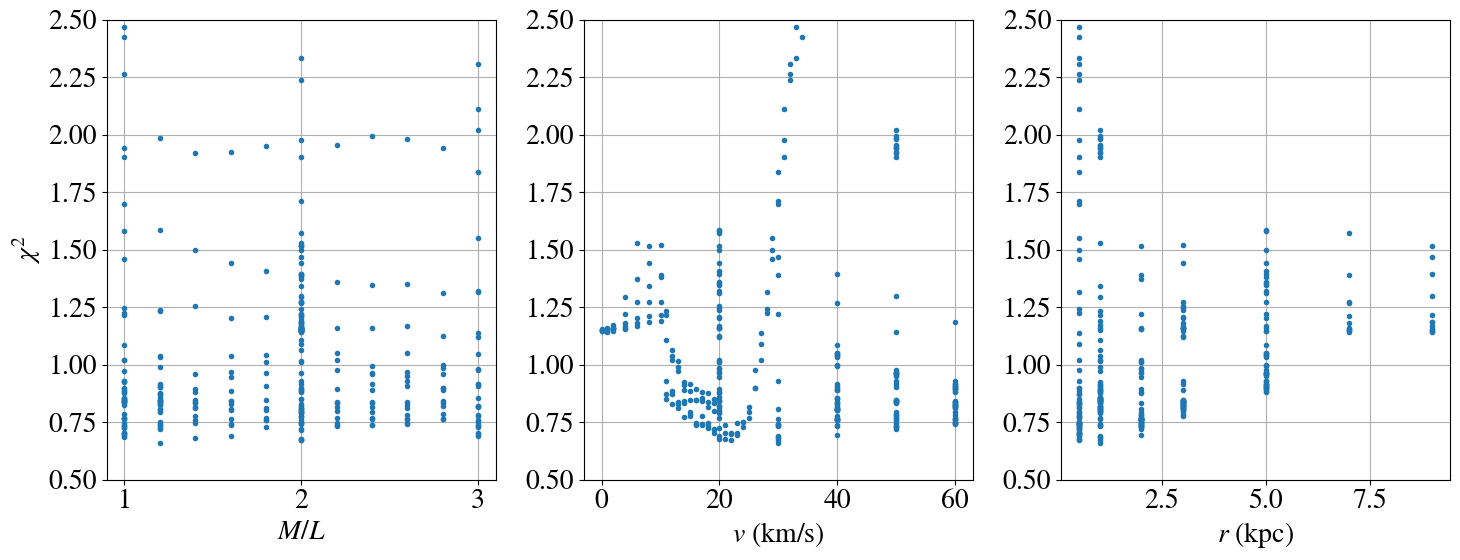

In [8]:
# figure
fig=plt.figure(figsize=(15,6),dpi=100)
ax1=fig.add_subplot(131)
ax2=fig.add_subplot(132)
ax3=fig.add_subplot(133)

ax1.plot(m_l, chisq, '.')

ax2.plot(v, chisq, '.')

ax3.plot(r, chisq, '.')

#ax1.set_xlim(-11,11)
ax1.set_ylim(0.5,2.5)
ax2.set_ylim(0.5,2.5)
ax3.set_ylim(0.5,2.5)

ax1.grid()
ax2.grid()
ax3.grid()


ax1.set_xlabel('$M/L$')
ax2.set_xlabel('$v$ (km/s)')
ax3.set_xlabel('$r$ (kpc)')

ax1.set_ylabel(r'$\chi^{2}$')

plt.tight_layout()

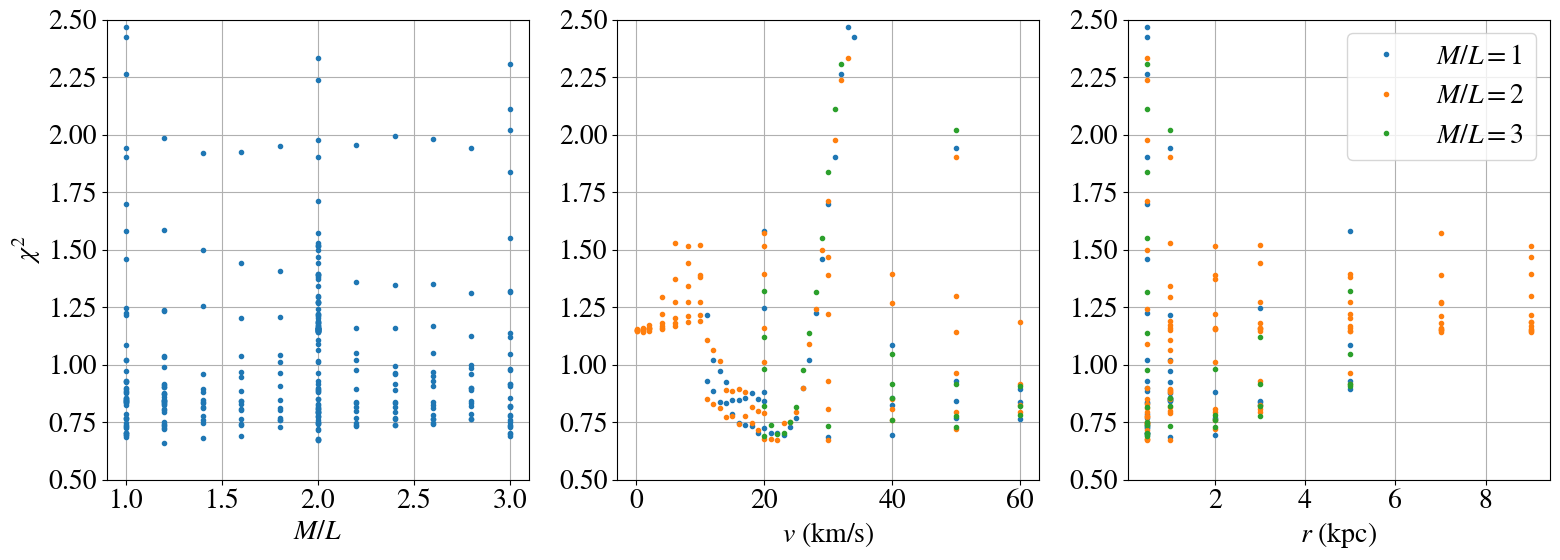

In [9]:
# figure
fig=plt.figure(figsize=(16,6),dpi=100)
ax1=fig.add_subplot(131)
ax2=fig.add_subplot(132)
ax3=fig.add_subplot(133)

ax1.plot(m_l, chisq, '.')

ax2.plot(v[i1], chisq[i1], '.', label='$M/L=1$')
ax2.plot(v[i2], chisq[i2], '.', label='$M/L=2$')
ax2.plot(v[i3], chisq[i3], '.', label='$M/L=3$')

ax3.plot(r[i1], chisq[i1], '.', label='$M/L=1$')
ax3.plot(r[i2], chisq[i2], '.', label='$M/L=2$')
ax3.plot(r[i3], chisq[i3], '.', label='$M/L=3$')

#ax1.set_xlim(-11,11)
ax1.set_ylim(0.5,2.5)
ax2.set_ylim(0.5,2.5)
ax3.set_ylim(0.5,2.5)

ax1.grid()
ax2.grid()
ax3.grid()

#ax2.legend()
ax3.legend()

ax1.set_xlabel('$M/L$')
ax2.set_xlabel('$v$ (km/s)')
ax3.set_xlabel('$r$ (kpc)')

ax1.set_ylabel(r'$\chi^{2}$')

plt.tight_layout()

In [10]:
imin=np.argmin(chisq)
m_l[imin], v[imin], r[imin]

(1.2, 30.0, 1.0)

In [11]:
dM=pd.read_csv('grav/mods_90/m1.2b0.0v30.0r1/dMhalo.dat',sep='\s+',header=None)
dM

,0,1,2
0,1,1,1.367200e+03
1,1,2,1.367269e+03
2,1,3,1.367268e+03
3,1,4,1.367268e+03
4,1,5,1.367269e+03
...,...,...,...
1595,80,16,1.104498e+07
1596,80,17,1.104498e+07
1597,80,18,1.104498e+07
1598,80,19,1.104499e+07


In [12]:
dM_total=pd.read_csv('grav/mods_90/m1.2b0.0v30.0r1/dM.dat',sep='\s+',header=None)
dM_total

,0,1,2
0,1,1,1.420286e+03
1,1,2,1.418935e+03
2,1,3,1.417508e+03
3,1,4,1.416074e+03
4,1,5,1.414628e+03
...,...,...,...
1595,80,16,1.093233e+07
1596,80,17,1.094107e+07
1597,80,18,1.095104e+07
1598,80,19,1.096224e+07


In [13]:
dL=pd.read_csv('grav/mods_90/m1.2b0.0v30.0r1/dL.dat',sep='\s+',header=None)
dL

,0,1,2
0,1,1,44.568592
1,1,2,43.516140
2,1,3,42.482655
3,1,4,41.467503
4,1,5,40.467846
...,...,...,...
1595,80,16,32206.339800
1596,80,17,32443.025400
1597,80,18,32715.537100
1598,80,19,33068.957000


In [14]:
rbin=pd.read_csv('grav/mods_90/m1.2b0.0v30.0r1/bindemo_r.out',sep='\s+',header=None,skiprows=4)
rbin

,0,1,2,3,4,5,6
0,0,1,0.000000,0.000000,0.000368,0.0000,0.0735
1,1,1,0.000368,0.000750,0.001142,0.1500,0.2285
2,2,1,0.001142,0.001542,0.001952,0.3083,0.3905
3,3,1,0.001952,0.002377,0.002813,0.4754,0.5625
4,4,1,0.002813,0.003259,0.003718,0.6518,0.7435
...,...,...,...,...,...,...,...
77,77,20,0.825588,0.848534,0.872108,169.7068,174.4215
78,78,20,0.872108,0.896324,0.921202,179.2648,184.2405
79,79,20,0.921202,0.946763,0.973023,189.3526,194.6045
80,80,20,0.973023,0.999999,1.027712,199.9997,205.5425


In [15]:
r_list=rbin[6][1:81]*20e3/206625

M_list=np.array(dM[2])
Mstar_list=np.array(dM[2])
L_list=np.array(dL[2])
for i in range(dM[2].shape[0]):
    M_list[i]=np.sum(dM[2][:i])
    Mstar_list[i]=np.sum(dM_total[2][:i]-dM[2][:i])
    L_list[i]=np.sum(dL[2][:i])

M_list=M_list[19::20]
Mstar_list=Mstar_list[19::20]
L_list=L_list[19::20]
r_list.shape, M_list.shape, Mstar_list.shape

((80,), (80,), (80,))

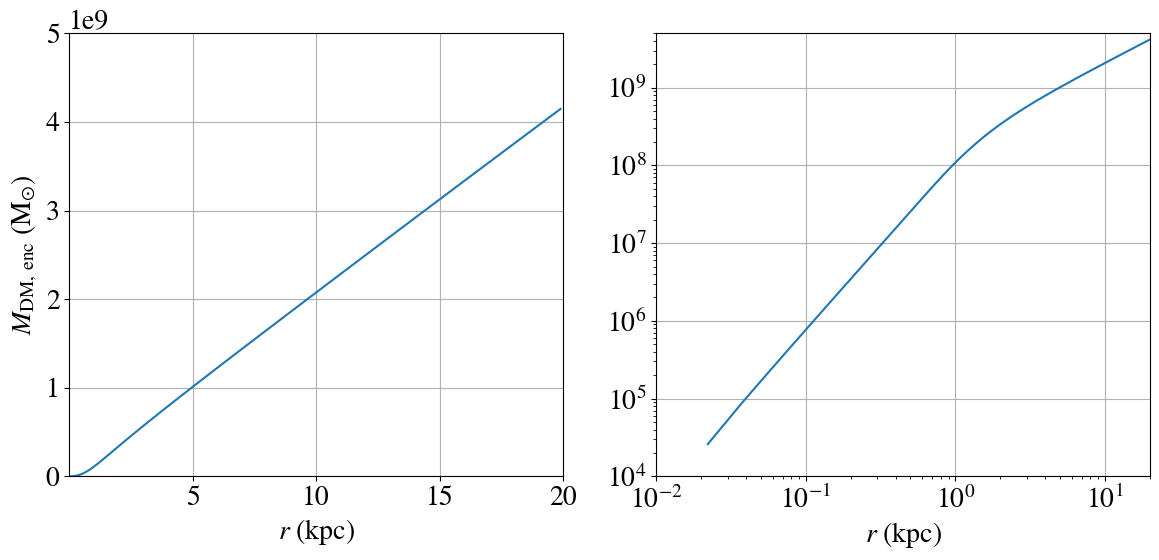

In [16]:
# figure
fig=plt.figure(figsize=(12,6),dpi=100)
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)

ax1.plot(r_list,M_list)
ax2.plot(r_list,M_list)

ax1.set_xlim(1e-2,20)
ax1.set_ylim(0,5e9)
ax2.set_xlim(1e-2,20)
ax2.set_ylim(1e4,5e9)

ax1.grid()
ax2.grid()

ax2.set_xscale('log')
ax2.set_yscale('log')

ax1.set_xlabel('$r$ (kpc)')
ax2.set_xlabel('$r$ (kpc)')
ax1.set_ylabel(r'$M_{\rm DM,\,enc}$ (M$_{\odot}$)')

plt.tight_layout()

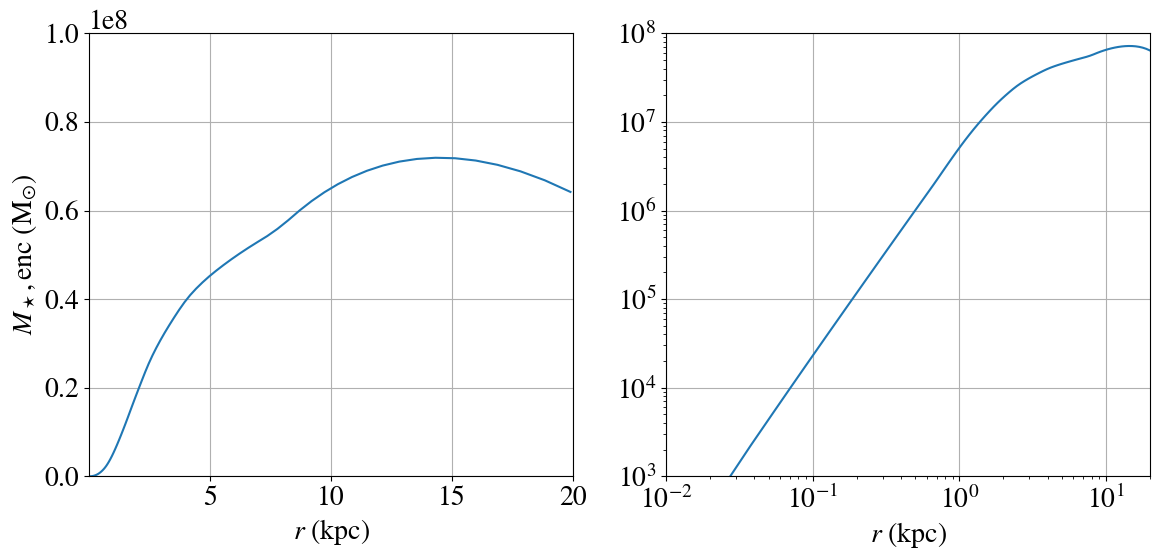

In [17]:
# figure
fig=plt.figure(figsize=(12,6),dpi=100)
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)

ax1.plot(r_list,Mstar_list)
ax2.plot(r_list,Mstar_list)

ax1.set_xlim(1e-2,20)
ax1.set_ylim(0,1e8)
ax2.set_xlim(1e-2,20)
ax2.set_ylim(1e3,1e8)

ax1.grid()
ax2.grid()

ax2.set_xscale('log')
ax2.set_yscale('log')

ax1.set_xlabel('$r$ (kpc)')
ax2.set_xlabel('$r$ (kpc)')
ax1.set_ylabel(r'$M_\star{\rm,enc}$ (M$_{\odot}$)')

plt.tight_layout()

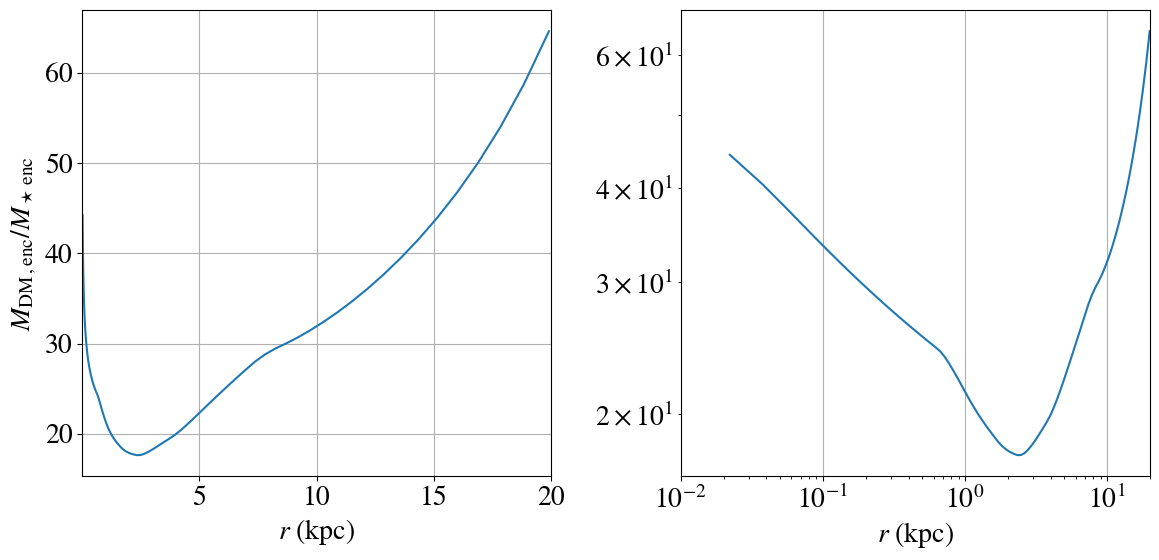

In [18]:
# figure
fig=plt.figure(figsize=(12,6),dpi=100)
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)

ax1.plot(r_list,M_list/Mstar_list)
ax2.plot(r_list,M_list/Mstar_list)

ax1.set_xlim(1e-2,20)
#ax1.set_ylim(0,5e9)
ax2.set_xlim(1e-2,20)
#ax2.set_ylim(1e4,5e9)

ax1.grid()
ax2.grid()

ax2.set_xscale('log')
ax2.set_yscale('log')

ax1.set_xlabel('$r$ (kpc)')
ax1.set_ylabel(r'$M_{\rm DM \, ,enc}/M_{\rm \star \, enc}$')
ax2.set_xlabel('$r$ (kpc)')

plt.tight_layout()

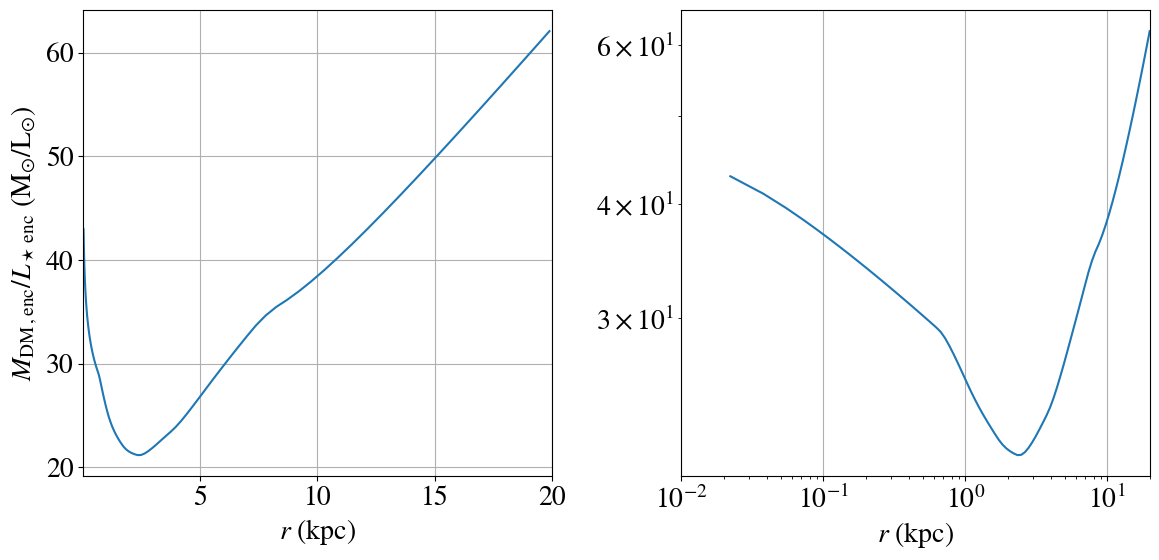

In [19]:
# figure
fig=plt.figure(figsize=(12,6),dpi=100)
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)

ax1.plot(r_list,M_list/L_list)
ax2.plot(r_list,M_list/L_list)

ax1.set_xlim(1e-2,20)
#ax1.set_ylim(0,5e9)
ax2.set_xlim(1e-2,20)
#ax2.set_ylim(1e4,5e9)

ax1.grid()
ax2.grid()

ax2.set_xscale('log')
ax2.set_yscale('log')

ax1.set_xlabel('$r$ (kpc)')
ax1.set_ylabel(r'$M_{\rm DM \, ,enc}/L_{\rm \star \,enc}$ (M$_{\odot}$/L$_{\odot}$)')
ax2.set_xlabel('$r$ (kpc)')

plt.tight_layout()

In [20]:
M_list, Mstar_list

(array([2.59780326e+04, 8.99680382e+04, 2.02348160e+05, 3.74115649e+05,
        6.17472651e+05, 9.46162887e+05, 1.37575963e+06, 1.92395377e+06,
        2.61086426e+06, 3.45937549e+06, 4.49551434e+06, 5.74887254e+06,
        7.25307970e+06, 9.04632770e+06, 1.11719823e+07, 1.36792436e+07,
        1.66239120e+07, 2.00692257e+07, 2.40868487e+07, 2.87579197e+07,
        3.41742988e+07, 4.04399173e+07, 4.76539957e+07, 5.58624039e+07,
        6.51554294e+07, 7.55526881e+07, 8.71389491e+07, 9.99044646e+07,
        1.13915872e+08, 1.29198351e+08, 1.45736241e+08, 1.63592532e+08,
        1.82716130e+08, 2.03163900e+08, 2.24928861e+08, 2.48001634e+08,
        2.72449212e+08, 2.98254064e+08, 3.25452296e+08, 3.54091753e+08,
        3.84189627e+08, 4.15815229e+08, 4.49018459e+08, 4.83862145e+08,
        5.20427104e+08, 5.58793520e+08, 5.99049866e+08, 6.41294552e+08,
        6.85641165e+08, 7.32197086e+08, 7.81089042e+08, 8.32456556e+08,
        8.86427374e+08, 9.43161843e+08, 1.00282173e+09, 1.065560

In [21]:
index=np.where(r_list>7)[0][0]
r_list[index], M_list[index]/1e9

(6.969388989715669, 1.5176271618805501)

In [22]:
df_int=pd.read_csv('grav/mods_90/m1.2b0.0v30.0r1/intmom.out',sep='\s+',header=0)
r=np.array(df_int['R'])*20e3/206625
beta=np.array(df_int['beta'])
theta=np.array(df_int['Theta'])

beta_mean=(beta[:20]+beta[20:40]+beta[40:60]+beta[60:80]+beta[80:100])/5

df_int

,R,Theta,V_r,V_theta,V_rV_t,V_phi,v_phi,beta
0,0.41,5.77,1.2552,2.8122,0.0,1.5158,0.0,-2.2390
1,1.16,5.77,1.0226,3.9281,0.0,3.2107,0.0,-11.3059
2,2.09,5.77,0.7538,5.1800,0.0,4.6520,0.0,-41.6550
3,3.24,5.77,1.6862,4.7202,0.0,7.9712,0.0,-14.0925
4,4.68,5.77,1.1958,9.9029,0.0,7.1423,0.0,-51.1289
...,...,...,...,...,...,...,...,...
95,76.60,71.57,16.9012,17.3320,0.0,17.7246,0.0,-0.0757
96,95.71,71.57,15.2557,16.0199,0.0,16.5495,0.0,-0.1398
97,119.41,71.57,15.4663,14.7234,0.0,15.1806,0.0,0.0652
98,148.83,71.57,15.0461,13.1379,0.0,13.3147,0.0,0.2272


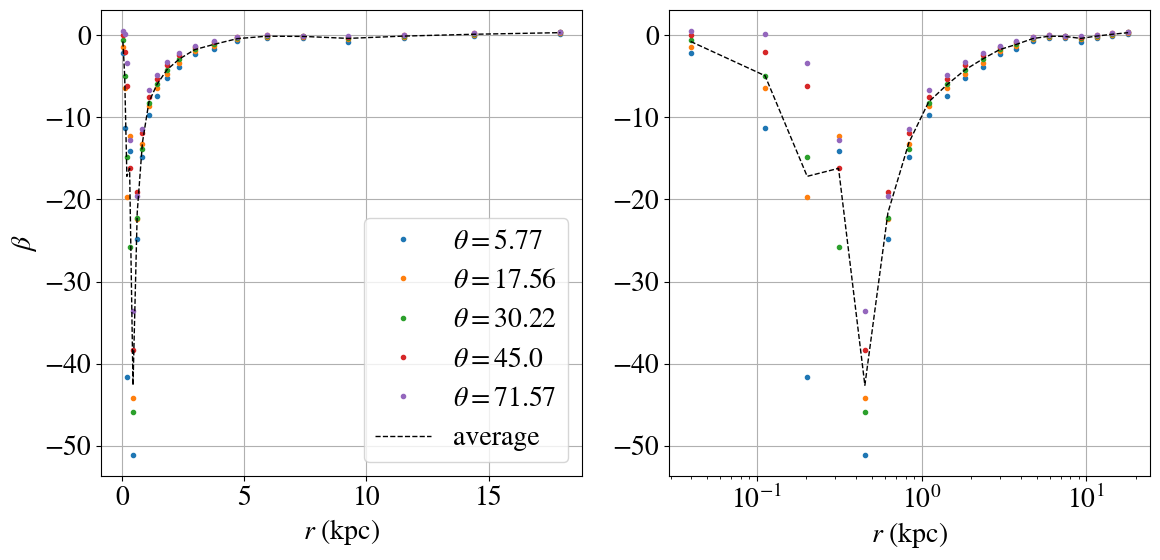

In [23]:
# figure
fig=plt.figure(figsize=(12,6),dpi=100)
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)


ax1.plot(r[:20], beta[:20], '.', label=r'$\theta={}$'.format(theta[0]))
ax1.plot(r[20:40], beta[20:40], '.', label=r'$\theta={}$'.format(theta[20]))
ax1.plot(r[40:60], beta[40:60], '.', label=r'$\theta={}$'.format(theta[40]))
ax1.plot(r[60:80], beta[60:80], '.', label=r'$\theta={}$'.format(theta[60]))
ax1.plot(r[80:100], beta[80:100], '.', label=r'$\theta={}$'.format(theta[80]))
ax1.plot(r[:20], beta_mean, 'k--', lw=1, label=r'average')


ax2.plot(r[:20], beta[:20], '.', label=r'$\theta={}$'.format(theta[0]))
ax2.plot(r[20:40], beta[20:40], '.', label=r'$\theta={}$'.format(theta[20]))
ax2.plot(r[40:60], beta[40:60], '.', label=r'$\theta={}$'.format(theta[40]))
ax2.plot(r[60:80], beta[60:80], '.', label=r'$\theta={}$'.format(theta[60]))
ax2.plot(r[80:100], beta[80:100], '.', label=r'$\theta={}$'.format(theta[80]))
ax2.plot(r[:20], beta_mean, 'k--', lw=1, label=r'mean')

#ax1.set_xlim(-11,11)
#ax1.set_ylim(-11,11)

ax1.grid()
ax2.grid()
ax1.legend()

ax1.set_xlabel('$r$ (kpc)')
ax2.set_xlabel('$r$ (kpc)')
ax1.set_ylabel(r'$\beta$')

ax2.set_xscale('log')

plt.tight_layout()

In [24]:
df1=pd.read_csv('result_incl.txt',sep='\s+',header=None)
m_l=df1[0]
v=df1[2]
r=df1[3]
chisq=df1[4]
df1

,0,1,2,3,4,5
0,1.0,0.0,10.0,0.5,6.969557,0.013737
1,1.0,0.0,10.0,1.0,6.630569,0.013737
2,1.0,0.0,1.0,1.0,6.480238,0.013737
3,1.0,0.0,11.0,0.5,7.089511,0.019781
4,1.0,0.0,11.0,1.0,6.703693,0.013737
...,...,...,...,...,...,...
277,3.0,0.0,50.0,3.0,6.198997,1.092055
278,3.0,0.0,50.0,5.0,5.895697,1.092055
279,3.0,0.0,60.0,1.0,NaN,NaN
280,3.0,0.0,60.0,2.0,7.399262,0.758371


In [25]:
i1=np.where(m_l==1)[0]
i2=np.where(m_l==2)[0]
i3=np.where(m_l==3)[0]


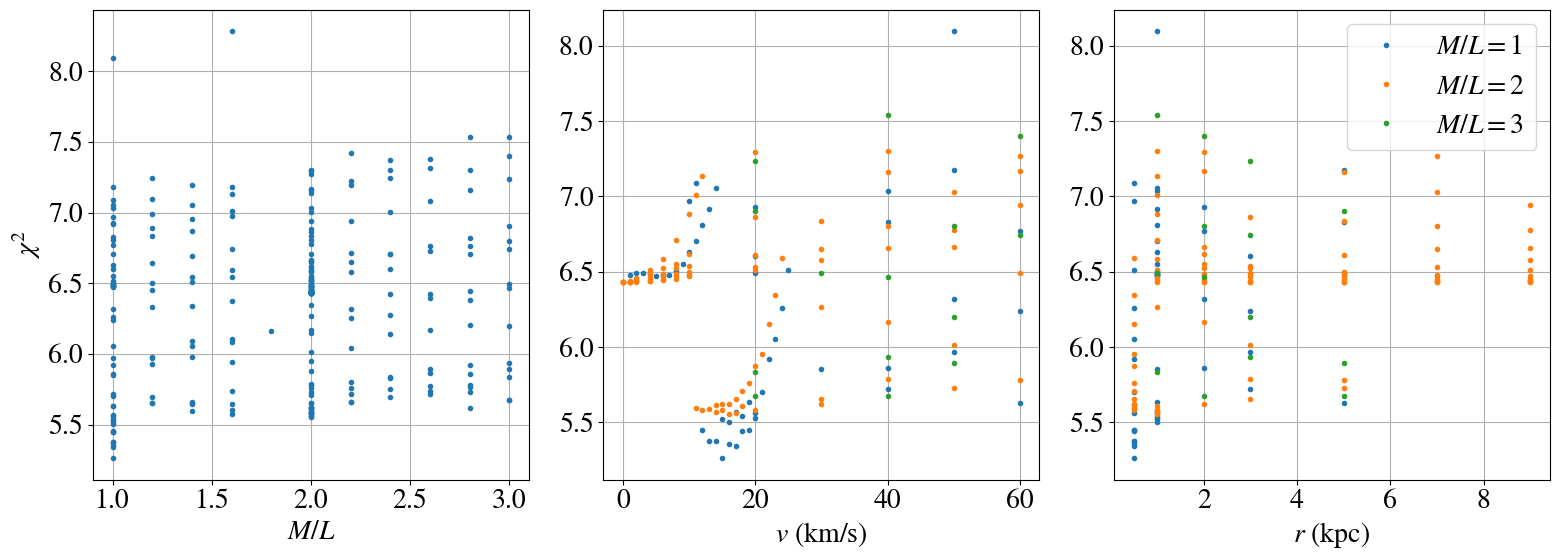

In [26]:
# figure
fig=plt.figure(figsize=(16,6),dpi=100)
ax1=fig.add_subplot(131)
ax2=fig.add_subplot(132)
ax3=fig.add_subplot(133)

ax1.plot(m_l, chisq, '.')

ax2.plot(v[i1], chisq[i1], '.', label='$M/L=1$')
ax2.plot(v[i2], chisq[i2], '.', label='$M/L=2$')
ax2.plot(v[i3], chisq[i3], '.', label='$M/L=3$')

ax3.plot(r[i1], chisq[i1], '.', label='$M/L=1$')
ax3.plot(r[i2], chisq[i2], '.', label='$M/L=2$')
ax3.plot(r[i3], chisq[i3], '.', label='$M/L=3$')

#ax1.set_xlim(-11,11)
#ax1.set_ylim(0.5,2.5)
#ax2.set_ylim(0.5,2.5)
#ax3.set_ylim(0.5,2.5)

ax1.grid()
ax2.grid()
ax3.grid()

ax3.legend()

ax1.set_xlabel('$M/L$')
ax2.set_xlabel('$v$ (km/s)')
ax3.set_xlabel('$r$ (kpc)')

ax1.set_ylabel(r'$\chi^{2}$')

plt.tight_layout()

In [27]:
index=np.where((m_l==2.0) & (v==20) & (r==1))[0]
index

array([141])

In [28]:
imin=np.argmin(chisq)
m_l[imin], v[imin], r[imin]

(1.0, 15.0, 0.5)

In [29]:
dM=pd.read_csv('grav-incl/mods_20/m1.0b0.0v15.0r0.5/dMhalo.dat',sep='\s+',header=None)
dM

,0,1,2
0,1,1,1.367744e+04
1,1,2,1.367814e+04
2,1,3,1.367815e+04
3,1,4,1.367816e+04
4,1,5,1.367818e+04
...,...,...,...
1595,80,16,2.771328e+06
1596,80,17,2.771326e+06
1597,80,18,2.771318e+06
1598,80,19,2.771317e+06


In [30]:
dM_total=pd.read_csv('grav-incl/mods_20/m1.0b0.0v15.0r0.5/dM.dat',sep='\s+',header=None)
dM_total

,0,1,2
0,1,1,9.912879e+03
1,1,2,9.686864e+03
2,1,3,9.464728e+03
3,1,4,9.246347e+03
4,1,5,9.031118e+03
...,...,...,...
1595,80,16,2.790301e+06
1596,80,17,2.788402e+06
1597,80,18,2.786227e+06
1598,80,19,2.783916e+06


In [31]:
dL=pd.read_csv('grav-incl/mods_20/m1.0b0.0v15.0r0.5/dL.dat',sep='\s+',header=None)
dL

,0,1,2
0,1,1,73.072075
1,1,2,58.965183
2,1,3,47.552341
3,1,4,38.305462
4,1,5,30.803883
...,...,...,...
1595,80,16,33783.781200
1596,80,17,30177.888700
1597,80,18,26528.839800
1598,80,19,23047.847700


In [32]:
rbin=pd.read_csv('grav-incl/mods_20/m1.0b0.0v15.0r0.5/bindemo_r.out',sep='\s+',header=None,skiprows=4)
rbin

,0,1,2,3,4,5,6
0,0,1,0.000000,0.000000,0.000368,0.0000,0.0735
1,1,1,0.000368,0.000750,0.001142,0.1500,0.2285
2,2,1,0.001142,0.001542,0.001952,0.3083,0.3905
3,3,1,0.001952,0.002377,0.002813,0.4754,0.5625
4,4,1,0.002813,0.003259,0.003718,0.6518,0.7435
...,...,...,...,...,...,...,...
77,77,20,0.825588,0.848534,0.872108,169.7068,174.4215
78,78,20,0.872108,0.896324,0.921202,179.2648,184.2405
79,79,20,0.921202,0.946763,0.973023,189.3526,194.6045
80,80,20,0.973023,0.999999,1.027712,199.9997,205.5425


In [33]:
r_list=rbin[6][1:81]*20e3/206625

M_list=np.array(dM[2])
Mstar_list=np.array(dM[2])
L_list=np.array(dL[2])
for i in range(dM[2].shape[0]):
    M_list[i]=np.sum(dM[2][:i])
    Mstar_list[i]=np.sum(dM_total[2][:i]-dM[2][:i])
    L_list[i]=np.sum(dL[2][:i])

M_list=M_list[19::20]
Mstar_list=Mstar_list[19::20]
L_list=L_list[19::20]
r_list.shape, M_list.shape, Mstar_list.shape

((80,), (80,), (80,))

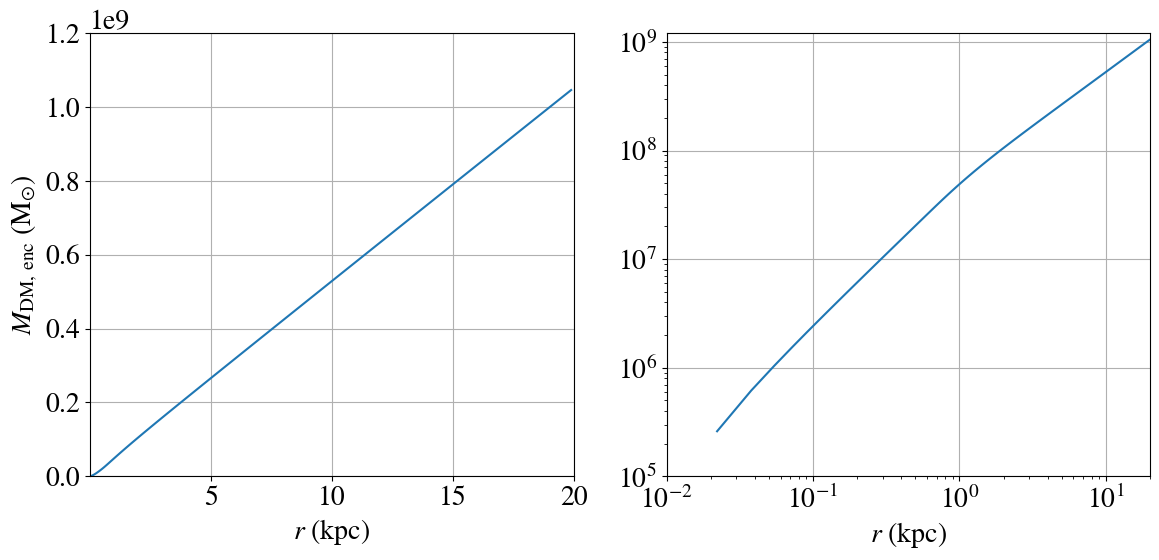

In [34]:
# figure
fig=plt.figure(figsize=(12,6),dpi=100)
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)

ax1.plot(r_list,M_list)
ax2.plot(r_list,M_list)

ax1.set_xlim(1e-2,20)
ax1.set_ylim(0,1.2e9)
ax2.set_xlim(1e-2,20)
ax2.set_ylim(1e5,1.2e9)

ax1.grid()
ax2.grid()

ax2.set_xscale('log')
ax2.set_yscale('log')

ax1.set_xlabel('$r$ (kpc)')
ax2.set_xlabel('$r$ (kpc)')
ax1.set_ylabel(r'$M_{\rm DM,\,enc}$ (M$_{\odot}$)')

plt.tight_layout()

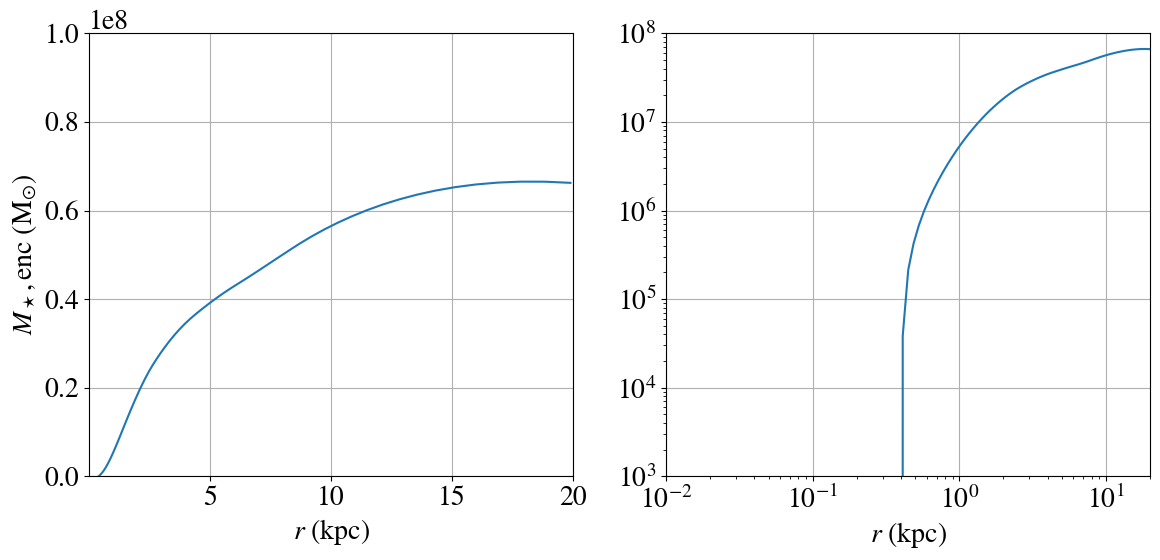

In [35]:
# figure
fig=plt.figure(figsize=(12,6),dpi=100)
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)

ax1.plot(r_list,Mstar_list)
ax2.plot(r_list,Mstar_list)

ax1.set_xlim(1e-2,20)
ax1.set_ylim(0,1e8)
ax2.set_xlim(1e-2,20)
ax2.set_ylim(1e3,1e8)

ax1.grid()
ax2.grid()

ax2.set_xscale('log')
ax2.set_yscale('log')

ax1.set_xlabel('$r$ (kpc)')
ax2.set_xlabel('$r$ (kpc)')
ax1.set_ylabel(r'$M_\star{\rm,enc}$ (M$_{\odot}$)')

plt.tight_layout()

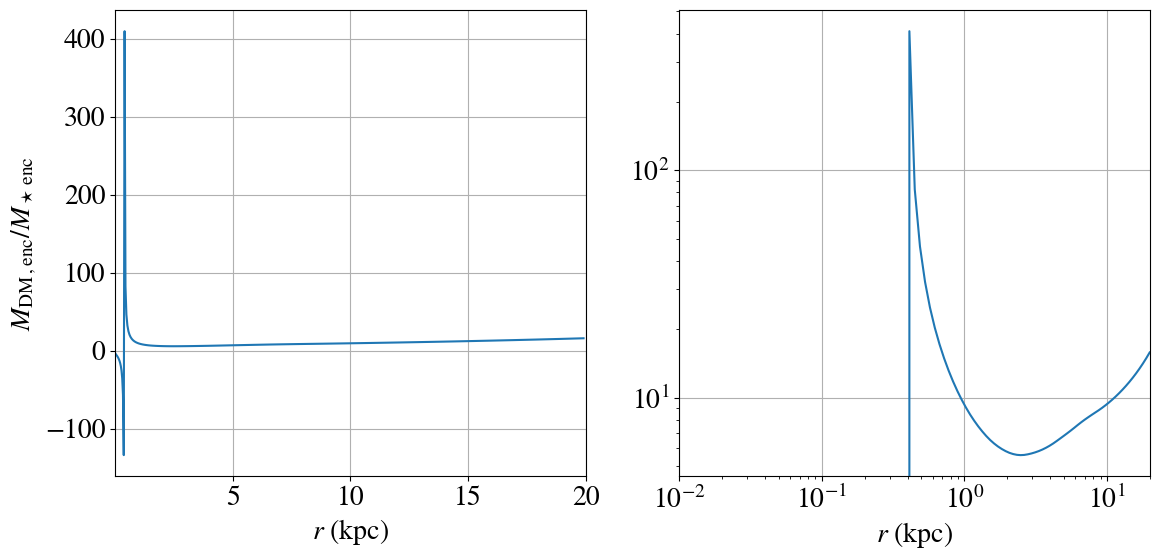

In [36]:
# figure
fig=plt.figure(figsize=(12,6),dpi=100)
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)

ax1.plot(r_list,M_list/Mstar_list)
ax2.plot(r_list,M_list/Mstar_list)

ax1.set_xlim(1e-2,20)
#ax1.set_ylim(0,5e9)
ax2.set_xlim(1e-2,20)
#ax2.set_ylim(1e4,5e9)

ax1.grid()
ax2.grid()

ax2.set_xscale('log')
ax2.set_yscale('log')

ax1.set_xlabel('$r$ (kpc)')
ax1.set_ylabel(r'$M_{\rm DM \, ,enc}/M_{\rm \star \, enc}$')
ax2.set_xlabel('$r$ (kpc)')

plt.tight_layout()

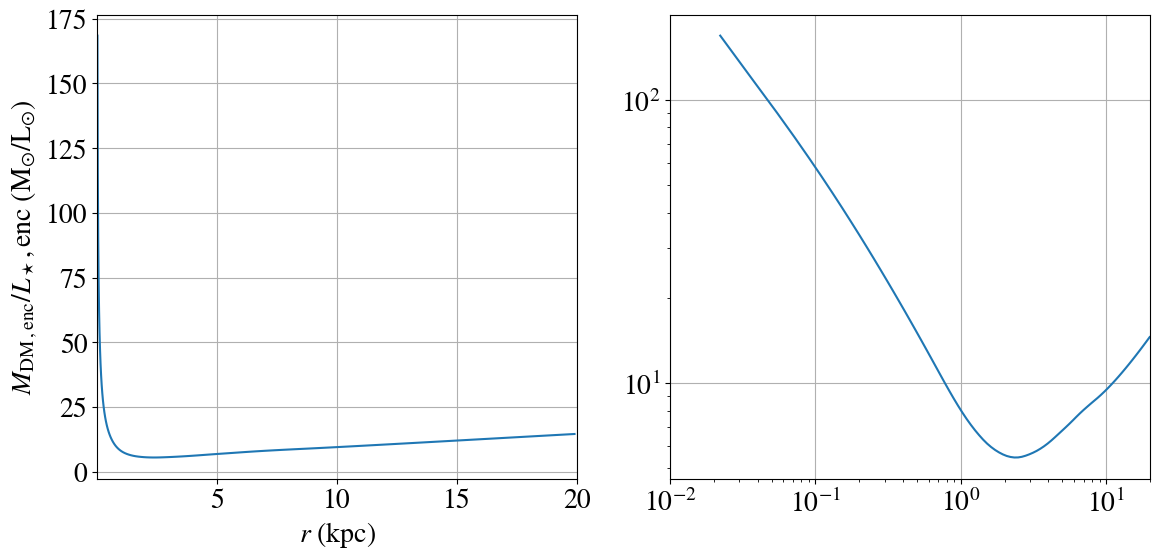

In [37]:
# figure
fig=plt.figure(figsize=(12,6),dpi=100)
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)

ax1.plot(r_list,M_list/L_list)
ax2.plot(r_list,M_list/L_list)

ax1.set_xlim(1e-2,20)
#ax1.set_ylim(0,5e9)
ax2.set_xlim(1e-2,20)
#ax2.set_ylim(1e4,5e9)

ax1.grid()
ax2.grid()

ax2.set_xscale('log')
ax2.set_yscale('log')

ax1.set_xlabel('$r$ (kpc)')
ax1.set_ylabel(r'$M_{\rm DM \, ,enc}/L_\star{\rm,enc}$ (M$_{\odot}$/L$_{\odot}$)')

plt.tight_layout()

In [38]:
M_list, Mstar_list

(array([2.59884571e+05, 6.15626269e+05, 1.04487289e+06, 1.54360108e+06,
        2.11156772e+06, 2.75036246e+06, 3.46271417e+06, 4.25218203e+06,
        5.12300816e+06, 6.08003967e+06, 7.12869463e+06, 8.27495167e+06,
        9.52535396e+06, 1.08870190e+07, 1.23676722e+07, 1.39756658e+07,
        1.57200201e+07, 1.76104537e+07, 1.96574429e+07, 2.18722536e+07,
        2.42670096e+07, 2.68547394e+07, 2.96439931e+07, 3.26256852e+07,
        3.58049271e+07, 3.91742481e+07, 4.27394199e+07, 4.64970304e+07,
        5.04528496e+07, 5.46121388e+07, 5.89783372e+07, 6.35609341e+07,
        6.83671613e+07, 7.34075397e+07, 7.86939121e+07, 8.42386981e+07,
        9.00550440e+07, 9.61592192e+07, 1.02566820e+08, 1.09294903e+08,
        1.16363556e+08, 1.23790655e+08, 1.31598746e+08, 1.39810020e+08,
        1.48446257e+08, 1.57534640e+08, 1.67100350e+08, 1.77170043e+08,
        1.87775118e+08, 1.98944724e+08, 2.10711539e+08, 2.23111032e+08,
        2.36177533e+08, 2.49950179e+08, 2.64469470e+08, 2.797761

In [39]:
index=np.where(r_list>7)[0][0]
r_list[index], M_list[index]/1e9

(6.969388989715669, 0.3908483092111)

In [40]:
df_int=pd.read_csv('grav-incl/mods_20/m1.0b0.0v15.0r0.5/intmom.out',sep='\s+',header=0)
r=np.array(df_int['R'])*20e3/206625
beta=np.array(df_int['beta'])
theta=np.array(df_int['Theta'])

beta_mean=(beta[:20]+beta[20:40]+beta[40:60]+beta[60:80]+beta[80:100])/5

df_int

,R,Theta,V_r,V_theta,V_rV_t,V_phi,v_phi,beta
0,0.41,5.77,4.9251,3.9578,0.0,3.8574,0.0,0.3704
1,1.16,5.77,4.5107,2.3793,0.0,4.9668,0.0,0.2547
2,2.09,5.77,4.0588,3.7299,0.0,5.6242,0.0,-0.3823
3,3.24,5.77,4.2565,6.5451,0.0,7.8867,0.0,-1.8988
4,4.68,5.77,5.5127,6.6207,0.0,12.1662,0.0,-2.1565
...,...,...,...,...,...,...,...,...
95,76.60,71.57,9.2403,9.1164,0.0,9.9466,0.0,-0.0660
96,95.71,71.57,9.3360,8.6184,0.0,9.1838,0.0,0.0901
97,119.41,71.57,9.1884,7.8704,0.0,8.5487,0.0,0.2003
98,148.83,71.57,8.5212,6.7101,0.0,7.3600,0.0,0.3169


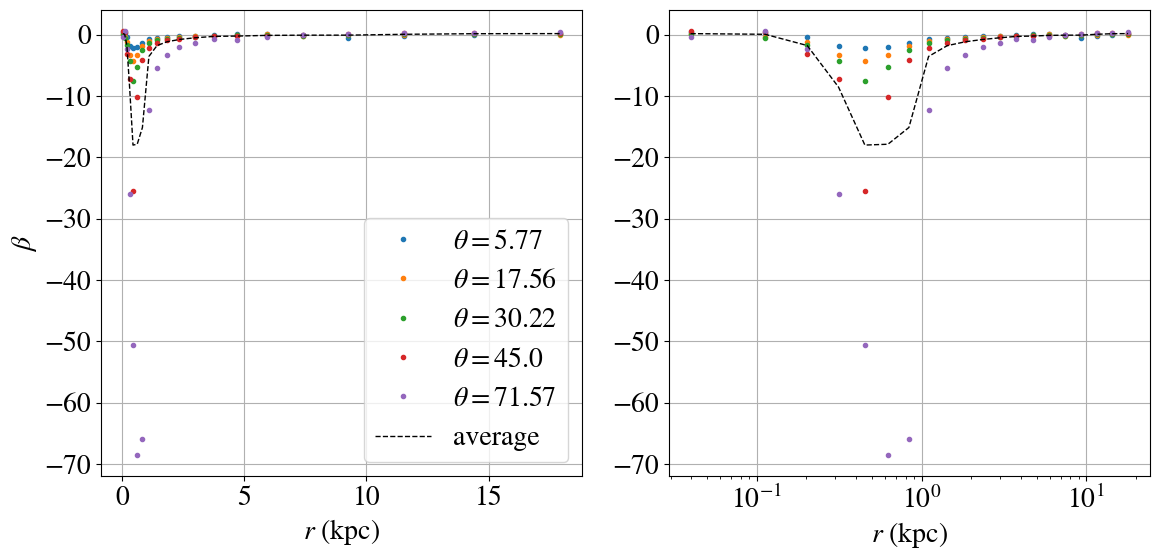

In [41]:
# figure
fig=plt.figure(figsize=(12,6),dpi=100)
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)


ax1.plot(r[:20], beta[:20], '.', label=r'$\theta={}$'.format(theta[0]))
ax1.plot(r[20:40], beta[20:40], '.', label=r'$\theta={}$'.format(theta[20]))
ax1.plot(r[40:60], beta[40:60], '.', label=r'$\theta={}$'.format(theta[40]))
ax1.plot(r[60:80], beta[60:80], '.', label=r'$\theta={}$'.format(theta[60]))
ax1.plot(r[80:100], beta[80:100], '.', label=r'$\theta={}$'.format(theta[80]))
ax1.plot(r[:20], beta_mean, 'k--', lw=1, label=r'average')


ax2.plot(r[:20], beta[:20], '.', label=r'$\theta={}$'.format(theta[0]))
ax2.plot(r[20:40], beta[20:40], '.', label=r'$\theta={}$'.format(theta[20]))
ax2.plot(r[40:60], beta[40:60], '.', label=r'$\theta={}$'.format(theta[40]))
ax2.plot(r[60:80], beta[60:80], '.', label=r'$\theta={}$'.format(theta[60]))
ax2.plot(r[80:100], beta[80:100], '.', label=r'$\theta={}$'.format(theta[80]))
ax2.plot(r[:20], beta_mean, 'k--', lw=1, label=r'mean')

#ax1.set_xlim(-11,11)
#ax1.set_ylim(-11,11)

ax1.grid()
ax2.grid()
ax1.legend()

ax1.set_xlabel('$r$ (kpc)')
ax2.set_xlabel('$r$ (kpc)')
ax1.set_ylabel(r'$\beta$')

ax2.set_xscale('log')

plt.tight_layout()